Fai riferimento al quadernetto arancione (dottorato 1) per il significato dei nomi e il relativo errore

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

from scipy.stats import median_abs_deviation as mad
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
zlow    = np.genfromtxt("./zlow.txt_").reshape(-1, 1)
z_high  = np.genfromtxt("./zhigh.txt_")

yl_over = np.genfromtxt("./classlow.txt_")

ylow    = np.ones(4615).reshape(-1, 1)
y_high  = np.ones(428)*2

In [3]:
comp_plot = []
cont_plot = []
pred_plot = []
reds_plot = []

for i in np.arange(0.1, 1.1, 0.1):
    i = round(i, 2)
    partComp = np.genfromtxt("./comp_{}.txt".format(i))
    partCont = np.genfromtxt("./cont_{}.txt".format(i))
    partPred = np.genfromtxt("./pred_{}.txt".format(i))
    partReds = np.genfromtxt("./reds_{}.txt".format(i))
    comp_plot.append(partComp)
    cont_plot.append(partCont)
    pred_plot.append(partPred)
    reds_plot.append(partReds)

<IPython.core.display.Javascript object>


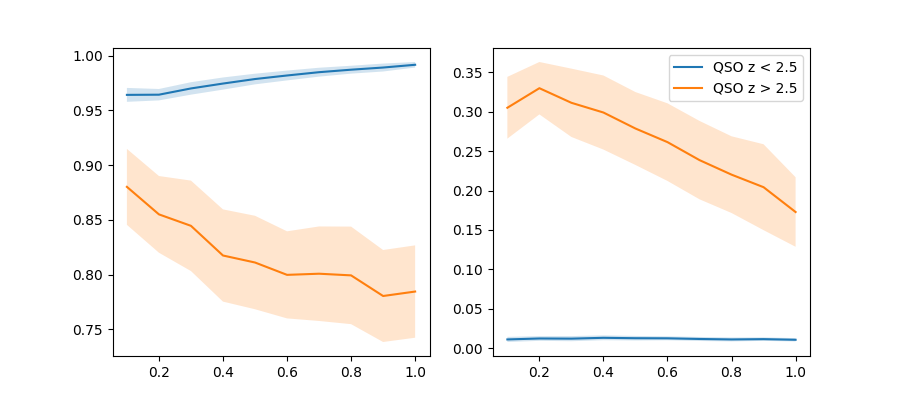

In [11]:
mean_comp    = np.mean(comp_plot, axis = 1)
mean_stdcomp = np.std(comp_plot, axis = 1)

mean_cont    = np.mean(cont_plot, axis = 1)
mean_stdcont = np.std(cont_plot, axis = 1)

fig, ax = plt.subplots(1, 2, figsize = (9, 4))
#completezza
ax[0].plot(np.arange(len(mean_comp[:, 0]))/10 + 0.1, mean_comp[:, 0], label = 'QSO z < 2.5')
ax[0].plot(np.arange(len(mean_comp[:, 1]))/10 + 0.1, mean_comp[:, 1], label = 'QSO z > 2.5')

ax[0].fill_between(np.arange(len(mean_comp[:, 0]))/10 + 0.1, mean_comp[:, 0] - mean_stdcomp[:, 0], mean_comp[:, 0] + mean_stdcomp[:, 0], alpha = 0.2)
ax[0].fill_between(np.arange(len(mean_comp[:, 1]))/10 + 0.1, mean_comp[:, 1] - mean_stdcomp[:, 1], mean_comp[:, 1] + mean_stdcomp[:, 1], alpha = 0.2)

# contaminazione
ax[1].plot(np.arange(len(mean_cont[:, 0]))/10 + 0.1, mean_cont[:, 0], label = 'QSO z < 2.5')
ax[1].plot(np.arange(len(mean_cont[:, 1]))/10 + 0.1, mean_cont[:, 1], label = 'QSO z > 2.5')

ax[1].fill_between(np.arange(len(mean_cont[:, 0]))/10 + 0.1, mean_cont[:, 0] - mean_stdcont[:, 0], mean_cont[:, 0] + mean_stdcont[:, 0], alpha = 0.2)
ax[1].fill_between(np.arange(len(mean_cont[:, 1]))/10 + 0.1, mean_cont[:, 1] - mean_stdcont[:, 1], mean_cont[:, 1] + mean_stdcont[:, 1], alpha = 0.2)

plt.legend()

<IPython.core.display.Javascript object>


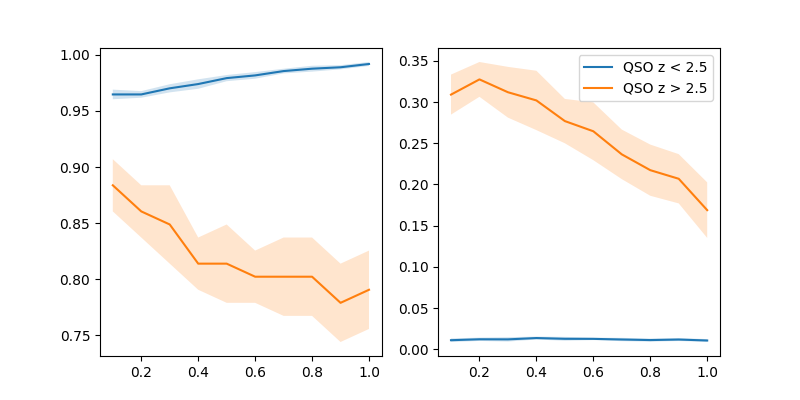

In [10]:
mean_comp    = np.median(comp_plot, axis = 1)
mean_stdcomp = mad(comp_plot, axis = 1)

mean_cont    = np.median(cont_plot, axis = 1)
mean_stdcont = mad(cont_plot, axis = 1)

fig, ax = plt.subplots(1, 2, figsize = (8, 4))
#completezza
ax[0].plot(np.arange(len(mean_comp[:, 0]))/10 + 0.1, mean_comp[:, 0], label = 'QSO z < 2.5')
ax[0].plot(np.arange(len(mean_comp[:, 1]))/10 + 0.1, mean_comp[:, 1], label = 'QSO z > 2.5')

ax[0].fill_between(np.arange(len(mean_comp[:, 0]))/10 + 0.1, mean_comp[:, 0] - mean_stdcomp[:, 0], mean_comp[:, 0] + mean_stdcomp[:, 0], alpha = 0.2)
ax[0].fill_between(np.arange(len(mean_comp[:, 1]))/10 + 0.1, mean_comp[:, 1] - mean_stdcomp[:, 1], mean_comp[:, 1] + mean_stdcomp[:, 1], alpha = 0.2)

# contaminazione
ax[1].plot(np.arange(len(mean_cont[:, 0]))/10 + 0.1, mean_cont[:, 0], label = 'QSO z < 2.5')
ax[1].plot(np.arange(len(mean_cont[:, 1]))/10 + 0.1, mean_cont[:, 1], label = 'QSO z > 2.5')

ax[1].fill_between(np.arange(len(mean_cont[:, 0]))/10 + 0.1, mean_cont[:, 0] - mean_stdcont[:, 0], mean_cont[:, 0] + mean_stdcont[:, 0], alpha = 0.2)
ax[1].fill_between(np.arange(len(mean_cont[:, 1]))/10 + 0.1, mean_cont[:, 1] - mean_stdcont[:, 1], mean_cont[:, 1] + mean_stdcont[:, 1], alpha = 0.2)

plt.legend()

In [6]:
np.set_printoptions(suppress=True)

div = 55
delta = 5.5/div

misclassified = []
obj_per_bin   = []

for (n, i) in enumerate(np.arange(0.1, 1.1, 0.1)):
    i = round(i, 2)
    
    smoter_low = RandomOverSampler(random_state = 0, sampling_strategy = i)

    y_low, _  = smoter_low.fit_resample(ylow, yl_over)
    z_low, _  = smoter_low.fit_resample(zlow, yl_over)

    y_low = y_low.flatten()
    z_low = z_low.flatten()

    # --------------------------------------------- #

    y  = np.concatenate((y_low, y_high))
    z  = np.concatenate((z_low, z_high))

    z_data = z

    # --------------------------------------------- #
    
    misclassified_i = []
    obj_per_bin_i   = []

    pred = pred_plot[n]
    reds = reds_plot[n]
    
    for j in range(100):
        _, y_test = train_test_split(y, train_size = .8, random_state = j, shuffle = True, stratify = y)

        pred_j = pred[j]
        reds_j = reds[j]

        misclassified_j = []
        obj_per_bin_j   = []

        for k in range(div):
            pred_wrong_cumulative = len(np.argwhere((pred_j != y_test) & (reds_j >= delta * k) & (reds_j < (delta * (k + 1)))))
            pred_total_cumulative = len(np.argwhere(                     (reds_j >= delta * k) & (reds_j < (delta * (k + 1)))))

            obj_per_bin_j.append(pred_total_cumulative)

            pred_total_cumulative = 1 if pred_total_cumulative == 0 else pred_total_cumulative
            misclassified_j.append(pred_wrong_cumulative/pred_total_cumulative)

        misclassified_i.append(np.array(misclassified_j))
        obj_per_bin_i.append(obj_per_bin_j)

    misclassified.append(misclassified_i)
    obj_per_bin.append(obj_per_bin_i)
        
misclassified = np.array(misclassified)
obj_per_bin = np.array(obj_per_bin)

In [7]:
obj_per_bin_mean = np.mean(obj_per_bin, axis = 1)
obj_per_bin_med  = np.median(obj_per_bin, axis = 1)

obj_per_bin_sigm = np.std(obj_per_bin, axis = 1)
obj_per_bin_mad  = mad(obj_per_bin, axis = 1)

misc_sigm = np.std(misclassified, axis = 1)
misc_mad  = mad(misclassified, axis = 1)

misc_mean = np.mean(misclassified, axis = 1)
misc_med  = np.median(misclassified, axis = 1)

In [12]:
# Change this (range: [0.1, 1.]) to see single plots 
oversampling_str = 0.1

<IPython.core.display.Javascript object>


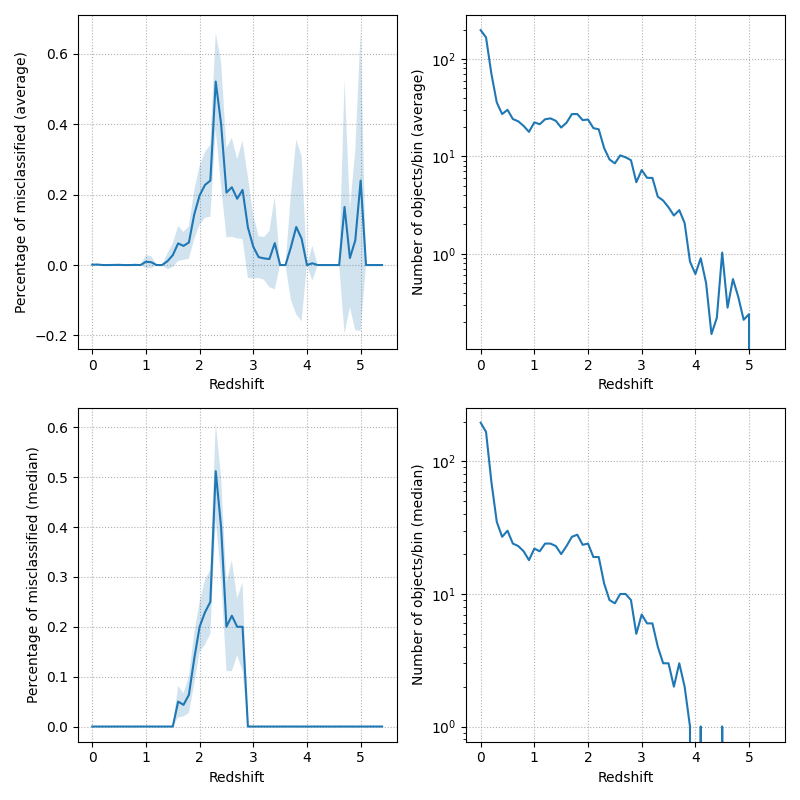

In [13]:
indx = int(round(10*(oversampling_str - 0.1)))

fig, ax = plt.subplots(2, 2, figsize = (8, 8))

opb_av = obj_per_bin_mean[indx]
opb_me = obj_per_bin_med[indx]
opb_ds = obj_per_bin_sigm[indx]
opb_ma = obj_per_bin_mad[indx]

mis_av = misc_mean[indx]
mis_me = misc_med[indx]
mis_ds = misc_sigm[indx]
mis_ma = misc_mad[indx]

ax[0][0].set_xlabel("Redshift")
ax[0][1].set_xlabel("Redshift")
ax[1][0].set_xlabel("Redshift")
ax[1][1].set_xlabel("Redshift")

ax[0][0].set_ylabel("Percentage of misclassified (average)")
ax[0][1].set_ylabel("Number of objects/bin (average)")
ax[1][0].set_ylabel("Percentage of misclassified (median)")
ax[1][1].set_ylabel("Number of objects/bin (median)")

ax[0][0].plot(np.arange(0, len(mis_av)/10, 0.1), mis_av)
ax[0][0].fill_between(np.arange(0, len(mis_av)/10, 0.1), mis_av - mis_ds, mis_av + mis_ds, alpha = 0.2)

ax[0][1].set_yscale('log')
ax[0][1].plot(np.arange(0, len(mis_av)/10, 0.1), opb_av)

ax[1][0].plot(np.arange(0, len(mis_me)/10, 0.1), mis_me)
ax[1][0].fill_between(np.arange(0, len(mis_me)/10, 0.1), mis_me - mis_ma, mis_me + mis_ma, alpha = 0.2)

ax[1][1].set_yscale('log')
ax[1][1].plot(np.arange(0, len(mis_me)/10, 0.1), opb_me)

ax[0][0].set_axisbelow(True)
ax[0][1].set_axisbelow(True)
ax[1][0].set_axisbelow(True)
ax[1][1].set_axisbelow(True)

ax[0][0].grid(linestyle=':')
ax[0][1].grid(linestyle=':')
ax[1][0].grid(linestyle=':')
ax[1][1].grid(linestyle=':')

plt.tight_layout()

<IPython.core.display.Javascript object>


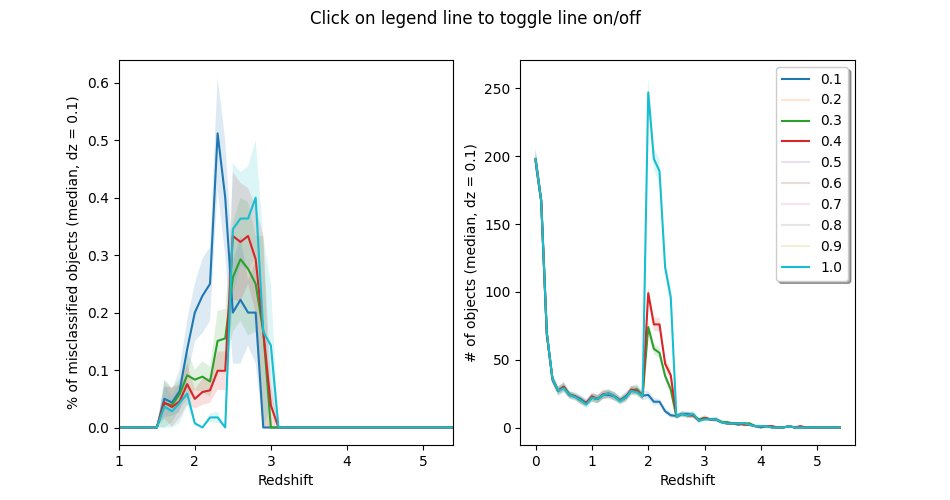

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (9.5, 5))
plt.suptitle('Click on legend line to toggle line on/off')

d  = []
dd = []
o  = []
oo = []

lined  = {}
shaded = {}
objected  = {}
objshaded = {}

for i in range(10):
    d.append( ax[0].plot(np.arange(0, len(misc_med[i, :]))/10, misc_med[i, :], label = "{}".format(round(i/10 + 0.1, 2))))
    dd.append(ax[0].fill_between(np.arange(0, len(misc_med[i, :]))/10, misc_med[i, :] - misc_mad[i, :], misc_med[i, :] + misc_mad[i, :], alpha = 0.15))
    
    o.append( ax[1].plot(np.arange(0, len(obj_per_bin_med[i, :]))/10, obj_per_bin_med[i, :], label = "{}".format(round(i/10 + 0.1, 2))))
    oo.append(ax[1].fill_between(np.arange(0, len(obj_per_bin_med[i, :]))/10, obj_per_bin_med[i, :] - obj_per_bin_mad[i, :], obj_per_bin_med[i, :] + obj_per_bin_mad[i, :], alpha = 0.15))
    
leg = plt.legend(fancybox = True, shadow = True)

lines     = np.array(d)[:, 0]
shades    = np.array(dd)
objects   = np.array(o)[:, 0]
objshades = np.array(oo)


for (legline, origline, fillline, obj, fillobj) in zip(leg.get_lines(), lines, shades, objects, objshades):
    legline.set_picker(True)  # Enable picking on the legend line.
    lined[legline]  = origline
    shaded[legline] = fillline
    objected[legline] = obj
    objshaded[legline] = fillobj

    
def reset(event, vis):
    event.set_visible(vis)
    
    
def on_pick(event):
    # On the pick event, find the original line corresponding to the legend
    # proxy line, and toggle its visibility.
    legline = event.artist
    
    origline     = lined[legline]
    origshade    = shaded[legline]
    origobj      = objected[legline]
    origobjshade = objshaded[legline]

    visible = not origline.get_visible()

    reset(origline, visible)
    reset(origshade, visible)
    reset(origobj, visible)
    reset(origobjshade, visible)
    
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled.
    legline.set_alpha(1.0 if visible else 0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', on_pick)
ax[0].set_xlim(1, 5.4)
ax[0].set_ylabel('% of misclassified objects (median, dz = 0.1)')
ax[0].set_xlabel('Redshift')

ax[1].set_ylabel('# of objects (median, dz = 0.1)')
ax[1].set_xlabel('Redshift')
plt.show()